# Assignment - Support Vector Machines (SVM)

<b>(1)</b> Create regression and classification models with SVM by reusing the data sets you use in the second project, t and the third project, respectively. Then, determine the most appropriate parameter values for these models. You can use the cross-validation methods you learned in the previous section to find the ideal parameter.

## 1.1. Classification with SVM

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn.tree as tree
import scipy
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

df_heart_attack = pd.read_csv('risk_of_heart_attack2.csv')
df_heart_attack.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
2,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
3,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
4,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0


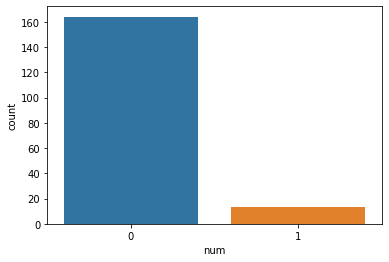

In [2]:
sns.countplot(x="num", data=df_heart_attack);

In [3]:
from imblearn.over_sampling import SMOTE

X = df_heart_attack.drop('num', axis=1)
y = df_heart_attack['num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11, stratify=y)

smote = SMOTE(random_state=11)
smote_train, smote_target = smote.fit_resample(X_train, y_train)

In [4]:
from sklearn.svm import SVC

svc = SVC(kernel='linear', C=1)
svc.fit(smote_train, smote_target)

SVC(C=1, kernel='linear')

In [5]:
from sklearn.metrics import accuracy_score

y_pred = svc.predict(X_test)
print("Accuracy Rate of SVC: {:.2f}".format(accuracy_score(y_test, y_pred)))

Accuracy Rate of SVC: 0.97


In [6]:
from sklearn.model_selection import GridSearchCV

parameters = {"kernel":['linear', 'poly', 'rbf'],
              "C": [0.001, 0.01, 0.1, 1],
              "gamma": [0.001, 0.1, 1, 10, 100]
             }

grid_cv = GridSearchCV(estimator=svc, param_grid=parameters, cv=5)
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(C=1, kernel='linear'),
             param_grid={'C': [0.001, 0.01, 0.1, 1],
                         'gamma': [0.001, 0.1, 1, 10, 100],
                         'kernel': ['linear', 'poly', 'rbf']})

In [7]:
df = pd.DataFrame(grid_cv.cv_results_)
df = df[['param_kernel','param_C', 'param_gamma','mean_test_score']]
df = df.sort_values(by='mean_test_score', ascending = False)
df

,param_kernel,param_C,param_gamma,mean_test_score
30,linear,0.1,0.001,0.936207
39,linear,0.1,10,0.936207
33,linear,0.1,0.1,0.936207
36,linear,0.1,1,0.936207
42,linear,0.1,100,0.936207
53,rbf,1,1,0.929064
38,rbf,0.1,1,0.929064
27,linear,0.01,100,0.929064
29,rbf,0.01,100,0.929064
1,poly,0.001,0.001,0.929064


## 1.2. Regression with SVM

In [8]:
df_house_prices = pd.read_csv('house_prices2.csv')
df_house_prices.head()

,SalePrice,BsmtQual,PoolQC,YearBuilt,OverallQual,GrLivArea,GarageCars
0,208500,3,0,2003,7,1710,2
1,181500,3,0,1976,6,1262,2
2,223500,3,0,2001,7,1786,2
3,140000,2,0,1915,7,1717,3
4,250000,3,0,2000,8,2198,3


In [9]:
from sklearn.metrics import mean_squared_error as mse

X = df_house_prices.drop('SalePrice', axis=1)
y = df_house_prices['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

In [10]:
from sklearn.svm import SVR

svr = SVR(kernel='linear', C=1)
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
rmse = mse(y_test, y_pred)
print(" Value of RMSE (Kernel = linear): {:.2f}".format(rmse))

 Value of RMSE (Kernel = linear): 2444156760.20


In [11]:
from sklearn.model_selection import GridSearchCV

parameters = {"kernel":['linear', 'poly', 'rbf'],
              "C": [1, 100, 1000]
             }

grid_cv = GridSearchCV(estimator=svr, param_grid=parameters, cv=3)
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=SVR(C=1, kernel='linear'),
             param_grid={'C': [1, 100, 1000],
                         'kernel': ['linear', 'poly', 'rbf']})

In [12]:
df = pd.DataFrame(grid_cv.cv_results_)
df = df[['param_kernel','param_C','mean_test_score']]
df = df.sort_values(by='mean_test_score', ascending = False)
df

,param_kernel,param_C,mean_test_score
6,linear,1000,0.724807
3,linear,100,0.697338
0,linear,1,0.617674
8,rbf,1000,0.324536
7,poly,1000,0.317532
4,poly,100,0.262785
5,rbf,100,0.014009
1,poly,1,-0.046242
2,rbf,1,-0.051808


<b>(2)</b> In SVR, what is the effect of using different 
ϵ
 on bias and variance?

The smaller the value of ϵ, the harder SVM tries to fit smaller errors
around the learnt SVM function, and leads to a more complex model. Smaller ϵ also leads to a less
sparse solution (more support vectors).

* Small ϵ - More complex model. Low Bias, High variance.
* Large ϵ - Less complex model. High Bias, Low Variance.

<b>(3)</b> Assume that you trained an SVM classifier with an poly kernel. It seems to underfit the training set. Then, what should be your next move? Should you increase or decrease 
γ
? What about C?

The gamma parameter defines how far the influence of a single training example reaches (low values mean far and a high value means close). When γ is small, the SVM tends to be underfitting.
C parameter balances the trade-off between the model complexity and empirical error. When C is small, the SVM tends to be underfitting. So in order to fix the underfitting problem we need to increase γ and C values.